# Facility Location Problem: Mathematical Formulation

## Problem Statement

A company wants to determine the optimal locations to build distribution centers to serve several customer zones. Building a facility at each location has a fixed cost, and there are transportation costs from each potential facility to each customer zone. The goal is to minimize the total cost while ensuring all customer demands are met.

## Sets and Indices

- $J = \{j \in J\}$: Set of potential facility locations, $J = \{\text{F1}, \text{F2}, \text{F3}, \text{F4}, \text{F5}\}$
- $I = \{i \in I\}$: Set of customer zones, $I = \{\text{C1}, \text{C2}, \text{C3}, \text{C4}, \text{C5}, \text{C6}, \text{C7}\}$

## Parameters

- $f_j$: Fixed cost of building a facility at location $j \in J$
  - $f_{\text{F1}} = 400$, $f_{\text{F2}} = 500$, $f_{\text{F3}} = 300$, $f_{\text{F4}} = 600$, $f_{\text{F5}} = 450$

- $s_j$: Maximum capacity of facility $j \in J$
  - $s_{\text{F1}} = 120$, $s_{\text{F2}} = 150$, $s_{\text{F3}} = 100$, $s_{\text{F4}} = 200$, $s_{\text{F5}} = 180$

- $d_i$: Demand of customer zone $i \in I$
  - $d_{\text{C1}} = 50$, $d_{\text{C2}} = 40$, $d_{\text{C3}} = 70$, $d_{\text{C4}} = 30$, $d_{\text{C5}} = 60$, $d_{\text{C6}} = 45$, $d_{\text{C7}} = 55$

- $c_{ij}$: Cost of shipping one unit from facility $j \in J$ to customer $i \in I$
  - Transportation cost matrix:

| Facility/Customer | C1 | C2 | C3 | C4 | C5 | C6 | C7 |
|-------------------|----|----|----|----|----|----|----| 
| F1                | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
| F2                | 6  | 4  | 3  | 5  | 7  | 9  | 8  |
| F3                | 9  | 8  | 7  | 6  | 5  | 4  | 3  |
| F4                | 5  | 7  | 6  | 4  | 3  | 5  | 7  |
| F5                | 7  | 6  | 5  | 4  | 6  | 7  | 5  |

## Decision Variables

- $y_j \in \{0, 1\}$: Binary variable indicating whether facility $j \in J$ is built (1) or not (0)
- $x_{ij} \geq 0$: Quantity shipped from facility $j \in J$ to customer $i \in I$

## Objective Function

Minimize the total cost, which includes fixed costs for building facilities and transportation costs:

$$\text{Minimize} \sum_{j \in J} f_j \cdot y_j + \sum_{i \in I} \sum_{j \in J} c_{ij} \cdot x_{ij}$$

## Constraints

1. **Demand Satisfaction**: Each customer's demand must be fully met:
   $$\sum_{j \in J} x_{ij} = d_i \quad \forall i \in I$$

2. **Capacity Constraints**: Cannot ship more than a facility's capacity and only if the facility is built:
   $$\sum_{i \in I} x_{ij} \leq s_j \cdot y_j \quad \forall j \in J$$

3. **Binary Constraints**: Facility is either built or not:
   $$y_j \in \{0, 1\} \quad \forall j \in J$$

4. **Non-negativity**: Shipment quantities must be non-negative:
   $$x_{ij} \geq 0 \quad \forall i \in I, j \in J$$

## Model Classification

This is a Mixed Integer Linear Programming (MILP) problem because:
- It has a linear objective function
- All constraints are linear
- Some variables are binary (integer) while others are continuous

## Solution Approach

The problem is solved using the Gurobi optimization solver, which implements various algorithms to efficiently solve MILP problems, including:
- Branch and bound
- Cutting plane methods
- Heuristics for finding feasible solutions quickly

## Key Solution Metrics

From the solution, we can analyze:
1. Which facilities to build ($y_j = 1$)
2. Optimal shipping plan ($x_{ij}$ values)
3. Total cost breakdown:
   - Facility costs: $\sum_{j \in J} f_j \cdot y_j$
   - Transportation costs: $\sum_{i \in I} \sum_{j \in J} c_{ij} \cdot x_{ij}$
4. Facility utilization: $\frac{\sum_{i \in I} x_{ij}}{s_j} \times 100\%$ for each built facility $j$

Set parameter Username
Set parameter LicenseID to value 2638131
Academic license - for non-commercial use only - expires 2026-03-18
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: Intel(R) Core(TM) Ultra 9 185H, instruction set [SSE2|AVX|AVX2]
Thread count: 11 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 12 rows, 40 columns and 75 nonzeros
Model fingerprint: 0xfe851a9d
Variable types: 35 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [3e+00, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 7e+01]
Presolve time: 0.01s
Presolved: 12 rows, 40 columns, 75 nonzeros
Variable types: 35 continuous, 5 integer (5 binary)
Found heuristic solution: objective 3465.0000000

Root relaxation: objective 2.303333e+03, 9 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexp

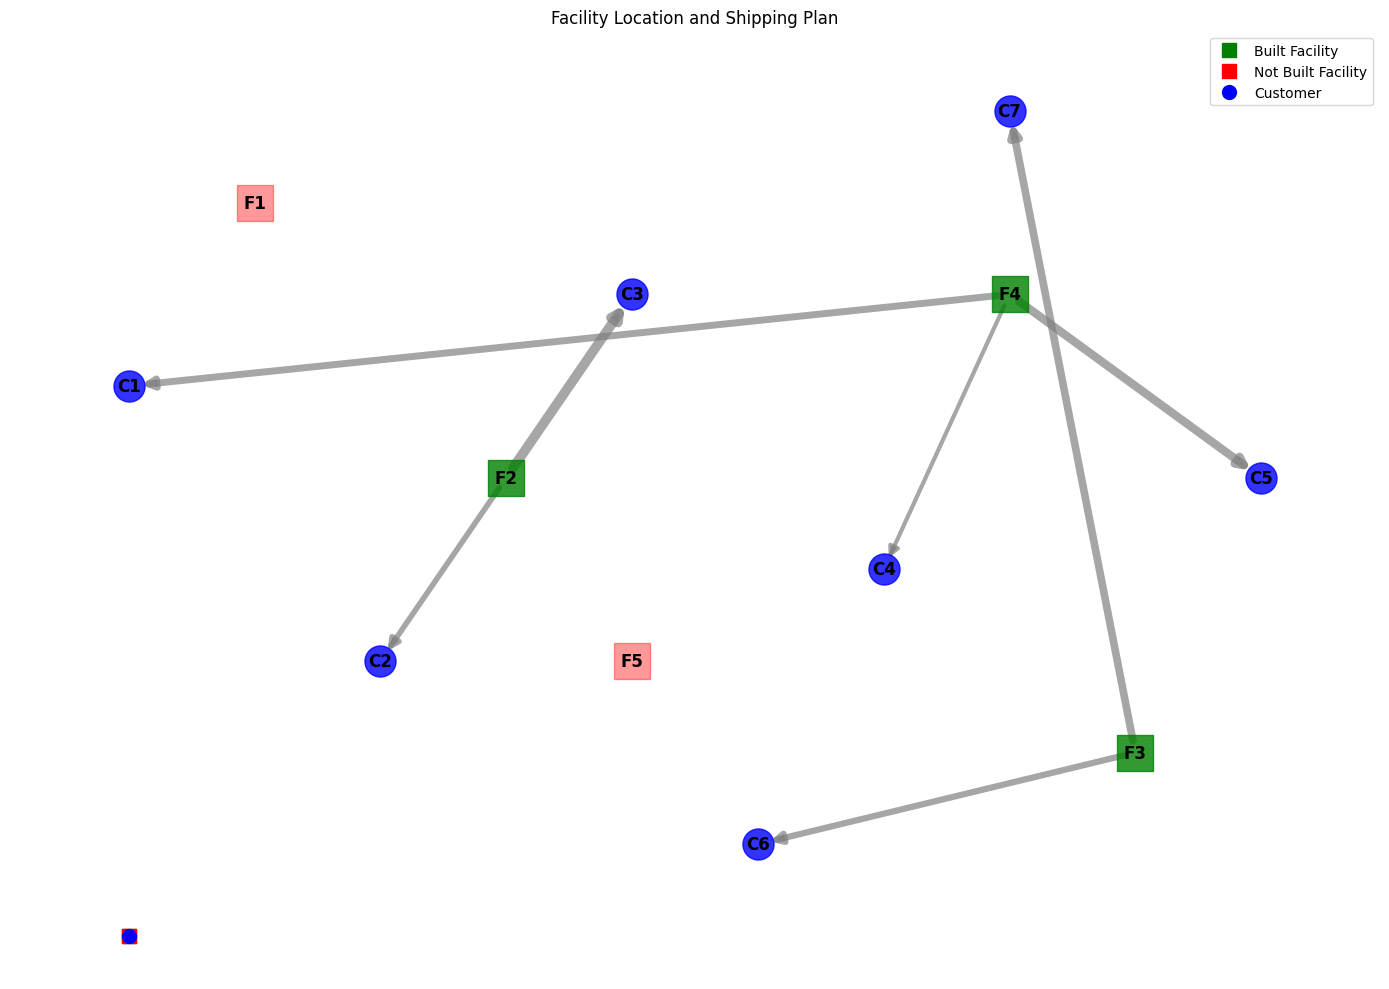

<Figure size 1200x600 with 0 Axes>

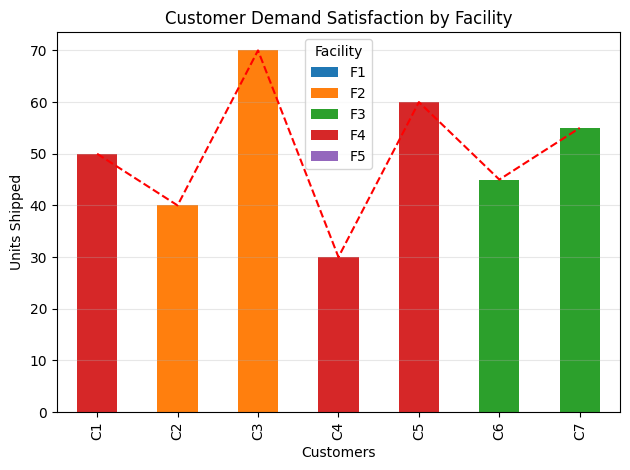

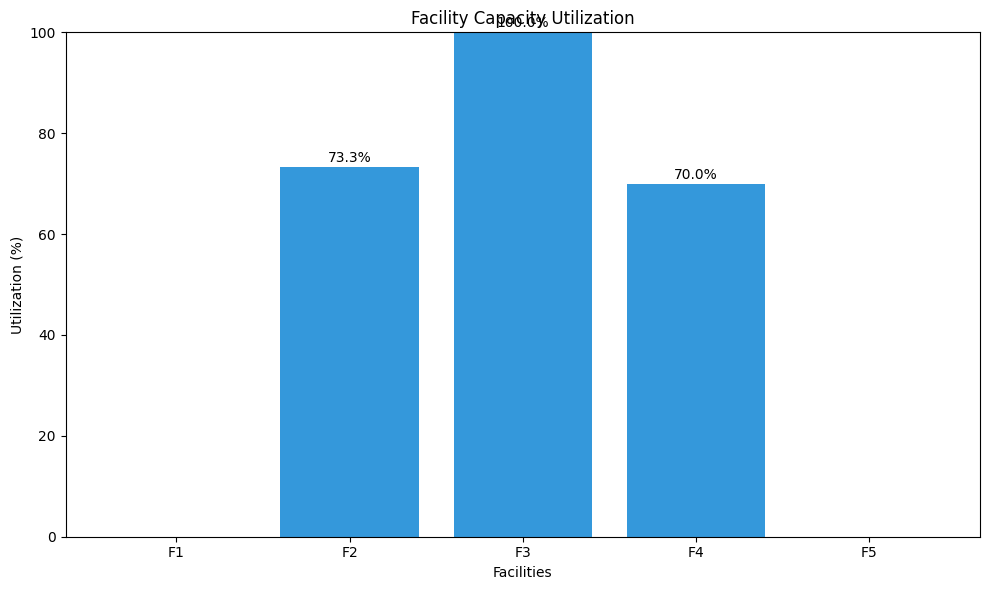

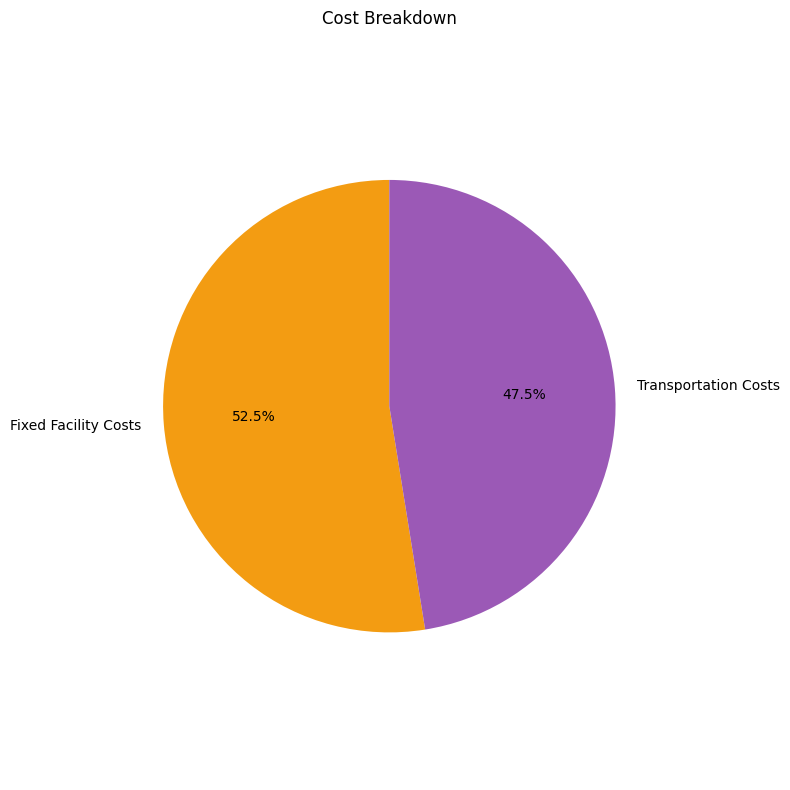

In [1]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

"""
Example 5: Facility Location Problem

Problem Statement: A company wants to determine the optimal locations to build distribution centers
to serve several customer zones. Building a facility at each location has a fixed cost, and there
are transportation costs from each potential facility to each customer zone. The goal is to minimize
the total cost while ensuring all customer demands are met.

Mathematical Model:
Let:
- y_j be a binary variable indicating whether facility j is built
- x_ij be the quantity shipped from facility j to customer i
- f_j be the fixed cost of building facility j
- c_ij be the cost of shipping one unit from facility j to customer i
- d_i be the demand of customer i
- s_j be the maximum capacity of facility j

Objective: Minimize total cost: sum(f_j * y_j) + sum(c_ij * x_ij)

Constraints:
- Demand satisfaction: sum(x_ij for j) = d_i for all i
- Capacity constraints: sum(x_ij for i) <= s_j * y_j for all j
- Binary constraints: y_j in {0, 1} for all j
- Non-negativity: x_ij >= 0 for all i, j
"""

# Parameters
facilities = ["F1", "F2", "F3", "F4", "F5"]
customers = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

# Fixed costs for building facilities
fixed_costs = {"F1": 400, "F2": 500, "F3": 300, "F4": 600, "F5": 450}

# Capacity of each facility
capacity = {"F1": 120, "F2": 150, "F3": 100, "F4": 200, "F5": 180}

# Customer demand
demand = {"C1": 50, "C2": 40, "C3": 70, "C4": 30, "C5": 60, "C6": 45, "C7": 55}

# Transportation cost per unit from facility to customer
trans_cost = {
    ("F1", "C1"): 4, ("F1", "C2"): 5, ("F1", "C3"): 6, ("F1", "C4"): 7, ("F1", "C5"): 8, ("F1", "C6"): 9, ("F1", "C7"): 10,
    ("F2", "C1"): 6, ("F2", "C2"): 4, ("F2", "C3"): 3, ("F2", "C4"): 5, ("F2", "C5"): 7, ("F2", "C6"): 9, ("F2", "C7"): 8,
    ("F3", "C1"): 9, ("F3", "C2"): 8, ("F3", "C3"): 7, ("F3", "C4"): 6, ("F3", "C5"): 5, ("F3", "C6"): 4, ("F3", "C7"): 3,
    ("F4", "C1"): 5, ("F4", "C2"): 7, ("F4", "C3"): 6, ("F4", "C4"): 4, ("F4", "C5"): 3, ("F4", "C6"): 5, ("F4", "C7"): 7,
    ("F5", "C1"): 7, ("F5", "C2"): 6, ("F5", "C3"): 5, ("F5", "C4"): 4, ("F5", "C5"): 6, ("F5", "C6"): 7, ("F5", "C7"): 5
}

# For visualization: Create coordinates for facilities and customers
np.random.seed(42)
facility_coords = {
    "F1": (1, 8), "F2": (3, 5), "F3": (8, 2), "F4": (7, 7), "F5": (4, 3)
}
customer_coords = {
    "C1": (0, 6), "C2": (2, 3), "C3": (4, 7), "C4": (6, 4), 
    "C5": (9, 5), "C6": (5, 1), "C7": (7, 9)
}

# Create the model
model = gp.Model("Facility Location")

# Decision variables
# y_j: Binary variable indicating if facility j is built
build_vars = model.addVars(facilities, vtype=GRB.BINARY, name="build")

# x_ij: Amount shipped from facility j to customer i
ship_vars = model.addVars(facilities, customers, vtype=GRB.CONTINUOUS, lb=0, name="ship")

# Objective function: minimize total cost
model.setObjective(
    gp.quicksum(fixed_costs[j] * build_vars[j] for j in facilities) +
    gp.quicksum(trans_cost[j, i] * ship_vars[j, i] for j in facilities for i in customers),
    GRB.MINIMIZE
)

# Constraints

# Demand satisfaction constraints: each customer's demand must be fully met
for i in customers:
    model.addConstr(
        gp.quicksum(ship_vars[j, i] for j in facilities) == demand[i],
        name=f"Demand_{i}"
    )

# Capacity constraints: can't ship more than a facility's capacity and only if it's built
for j in facilities:
    model.addConstr(
        gp.quicksum(ship_vars[j, i] for i in customers) <= capacity[j] * build_vars[j],
        name=f"Capacity_{j}"
    )

# Solve the model
model.optimize()

# Print the solution
print("\nFacility Decisions:")
for j in facilities:
    if build_vars[j].x > 0.5:
        print(f"Build facility {j}")
    else:
        print(f"Do not build facility {j}")

print("\nShipping Plan:")
for j in facilities:
    for i in customers:
        if ship_vars[j, i].x > 0:
            print(f"Ship {ship_vars[j, i].x} units from {j} to {i}")

# Calculate costs
facility_costs = sum(fixed_costs[j] * build_vars[j].x for j in facilities)
transportation_costs = sum(trans_cost[j, i] * ship_vars[j, i].x for j in facilities for i in customers)
total_cost = facility_costs + transportation_costs

print(f"\nTotal Cost: ${total_cost:.2f}")
print(f"Facility Costs: ${facility_costs:.2f}")
print(f"Transportation Costs: ${transportation_costs:.2f}")

# Visualize the solution
# 1. Network diagram showing facilities, customers, and shipments
plt.figure(figsize=(14, 10))

# Create a graph
G = nx.DiGraph()

# Add nodes for facilities and customers
for j in facilities:
    G.add_node(j, pos=facility_coords[j], node_type='facility')

for i in customers:
    G.add_node(i, pos=customer_coords[i], node_type='customer')

# Add edges for shipments
for j in facilities:
    for i in customers:
        if ship_vars[j, i].x > 0:
            G.add_edge(j, i, weight=ship_vars[j, i].x)

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
facility_nodes = [node for node in G.nodes() if node.startswith('F')]
customer_nodes = [node for node in G.nodes() if node.startswith('C')]

# Determine which facilities are built
built_facilities = [j for j in facilities if build_vars[j].x > 0.5]
not_built_facilities = [j for j in facilities if build_vars[j].x < 0.5]

# Draw built facilities
nx.draw_networkx_nodes(G, pos, nodelist=built_facilities, node_size=700, 
                      node_color='green', node_shape='s', alpha=0.8)

# Draw not built facilities
nx.draw_networkx_nodes(G, pos, nodelist=not_built_facilities, node_size=700, 
                      node_color='red', node_shape='s', alpha=0.4)

# Draw customers
nx.draw_networkx_nodes(G, pos, nodelist=customer_nodes, node_size=500, 
                      node_color='blue', node_shape='o', alpha=0.8)

# Add labels
nx.draw_networkx_labels(G, pos, font_weight='bold')

# Draw edges with width proportional to shipment amount
edges = G.edges()
weights = [G[u][v]['weight']/10 for u, v in edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', arrows=True, arrowsize=15, alpha=0.7)

# Add legend
plt.plot([0], [0], 's', color='green', markersize=10, label='Built Facility')
plt.plot([0], [0], 's', color='red', markersize=10, label='Not Built Facility')
plt.plot([0], [0], 'o', color='blue', markersize=10, label='Customer')

plt.legend(loc='upper right')
plt.title('Facility Location and Shipping Plan')
plt.axis('off')
plt.tight_layout()
plt.savefig('facility_network.png')
plt.show()

# 2. Stacked bar chart of customer demand satisfaction
shipment_data = {}
for i in customers:
    shipment_data[i] = [ship_vars[j, i].x if build_vars[j].x > 0.5 else 0 for j in facilities]

df = pd.DataFrame(shipment_data, index=facilities)
df = df.T  # Transpose for better visualization

plt.figure(figsize=(12, 6))
df.plot(kind='bar', stacked=True)
plt.xlabel('Customers')
plt.ylabel('Units Shipped')
plt.title('Customer Demand Satisfaction by Facility')
plt.legend(title='Facility')
plt.grid(axis='y', alpha=0.3)

# Add demand line
plt.plot(range(len(customers)), [demand[i] for i in customers], 'r--', label='Demand')
plt.tight_layout()
plt.savefig('demand_satisfaction.png')
plt.show()

# 3. Facility utilization
utilization = {}
for j in facilities:
    if build_vars[j].x > 0.5:
        used_capacity = sum(ship_vars[j, i].x for i in customers)
        utilization[j] = (used_capacity / capacity[j]) * 100
    else:
        utilization[j] = 0

plt.figure(figsize=(10, 6))
plt.bar(utilization.keys(), utilization.values(), color=['#3498db' if v > 0 else '#e74c3c' for v in utilization.values()])
plt.xlabel('Facilities')
plt.ylabel('Utilization (%)')
plt.title('Facility Capacity Utilization')
plt.ylim(0, 100)
for i, (j, v) in enumerate(utilization.items()):
    if v > 0:
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.savefig('facility_utilization.png')
plt.show()

# 4. Cost breakdown pie chart
cost_components = {
    "Fixed Facility Costs": facility_costs,
    "Transportation Costs": transportation_costs
}

plt.figure(figsize=(8, 8))
plt.pie(cost_components.values(), labels=cost_components.keys(), autopct='%1.1f%%', 
         colors=['#f39c12', '#9b59b6'], startangle=90)
plt.axis('equal')
plt.title('Cost Breakdown')
plt.tight_layout()
plt.savefig('cost_breakdown.png')
plt.show()